# Final Project - The Awesome Bank Marketing Campaign


After your success in the first project at The Awesome Bank, an even more exciting new project appears!

The marketing team wants to launch a new campaign aimed at convincing customers to open term deposits.

Until now, the strategy was to call as many people as possible, indiscriminately, and try to sell them the product. However, this approach, in addition to spending more resources because it involves having several people calling all customers, is also uncomfortable for some customers who do not like to be disturbed by this type of call. After the calculations, it was concluded that:

    - For each customer identified as a good candidate, and is the target of the campaign but does not adhere to the term deposit, the bank has a cost of 500 euros.
      - For each customer who is identified as a candidate, and as such is not the target of the campaign but was actually a good candidate and would join, the bank has a cost of 2000 euros.
    
Based on this information, can you help the marketing team by creating a model that selects the best candidates to be targeted by the campaign, in order to reduce costs?


**The dataset contains information about all customers who were targeted by the campaign:**

    1 - age 
    2 - job : type of job 
    3 - marital : marital status
    4 - education
    5 - default: has credit in default? 
    6 - housing: has housing loan? 
    7 - loan: has personal loan? 
    8 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
    9 - previous: number of contacts performed before this campaign and for this client 
    10 - poutcome: outcome of the previous marketing campaign 
    11 - emp.var.rate: employment variation rate - quarterly indicator 
    12 - cons.price.idx: consumer price index - monthly indicator
    13 - cons.conf.idx: consumer confidence index - monthly indicator 
    14 - euribor3m: euribor 3 month rate - daily indicator 
    15 - nr.employed: number of employees - quarterly indicator 

**Output:**
    
    y: has the client subscribed a term deposit? 
    
   

#### Questions:

     1. How many features are available? How many customers?
     2. How many customers do you have in the dataset who actually subscribed to the term deposit? And how many didn't?
     3. What are the most relevant features to decide whether a customer is more likely to adhere to term deposit?
     4. Which algorithm led to the best results?
     5. Which evaluation metrics did you use to compare the performance of the various models? Why?
     6. What is the cost that the bank has without any model?
     7. What cost does the bank have with your model?
    
    
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import category_encoders
from category_encoders import OneHotEncoder as OHE
from category_encoders import BinaryEncoder

import numpy as np



pd.options.mode.chained_assignment = None

seed = 42

In [2]:
df = pd.read_csv('data/bank_marketing_campaign.csv')

In [3]:
df

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# 1. How many features are available? How many customers?

In [4]:
observations = df.shape[0]
features = df.shape[1]

print(f'This dataset has {features} features available and our dataset contains {observations} customers.')

This dataset has 16 features available and our dataset contains 41188 customers.


# 2. How many customers do you have in the dataset who actually signed up for the term deposit? And how many didn't?

In [5]:
# Just to check if there were missing values in the y variable, and thus take the opportunity to check for missing values in the entire dataset.
# As we can see, there are no missing values in this dataset

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

> Our dataset has no missing values.

In [6]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [7]:
no = (df['y']=='no').sum()
yes = (df['y']=='yes').sum()

print(f'In this dataset, there are {yes} customers who effectively adhered to the term deposit, and {no} customers who effectively did not adhere to the term deposit.')

In this dataset, there are 4640 customers who effectively adhered to the term deposit, and 36548 customers who effectively did not adhere to the term deposit.


# 3. What are the most relevant features to decide whether a customer is more likely to adhere to the term deposit?

Before we analyze the correlation between the variables, let's deal with the categorical variables that we want to add to our model. Just like the target variable.

## 3.1. Quick observation of the data

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Taking into account our target variable, and the objective of this project, which is to select the best candidates to receive the marketing campaign, in order to reduce costs for the Awesome Bank.

Taking into account the knowledge we have about the context and the variables present, they all seem to me to be quite interesting for solving our problem. I will continue with all of them instead of excluding those that seem less important at this point, and see how they behave.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   pdays           41188 non-null  int64  
 8   previous        41188 non-null  int64  
 9   poutcome        41188 non-null  object 
 10  emp.var.rate    41188 non-null  float64
 11  cons.price.idx  41188 non-null  float64
 12  cons.conf.idx   41188 non-null  float64
 13  euribor3m       41188 non-null  float64
 14  nr.employed     41188 non-null  float64
 15  y               41188 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 5.0+ MB


In [10]:
var_cat = len(df.select_dtypes(include=['object']).columns)

var_num = len(df.select_dtypes(include=['int', 'float']).columns)


print(f'This dataset has {var_cat} categorical variables and {var_num} numeric variables (including the target variable).')

This dataset has 8 categorical variables and 8 numeric variables (including the target variable).


> We can see above that we have numerical and categorical variables. Let's look at them one by one.

### 3.1.1. Encoding da variável target: `y`

> **Como eu quero que a minha variável target `y` apareça no meu heatmap e no meu boxplot**  vou fazer agora o encoding da minha variável target. 

In [11]:
# Observar os valores da nossa target 

df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [12]:
# Encoding da variável target
# Ordinal Encoding


ord_encoder_y = OrdinalEncoder(categories=[['no', 'yes']])

df['y'] = ord_encoder_y.fit_transform(df[['y']])

df['y'].value_counts()

0.0    36548
1.0     4640
Name: y, dtype: int64

In [13]:
# Porque eu quero que seja número inteiro e não float

df['y'] = df['y'].astype(int)

df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [14]:
ord_encoder_y.categories_

[array(['no', 'yes'], dtype=object)]

## 3.2. Variance Threshold

In [15]:
df_num = df.select_dtypes(include=['int', 'float'])

In [16]:
# Calculate the variance of each variable

df_num.std()**2

age                 108.602451
pdays             34935.687284
previous              0.244927
emp.var.rate          2.467915
cons.price.idx        0.335056
cons.conf.idx        21.420215
euribor3m             3.008308
nr.employed        5220.283250
y                     0.099966
dtype: float64

In [17]:
var_th = VarianceThreshold(threshold=0.05)
var_th.fit_transform(df_num)

array([[5.6000e+01, 9.9900e+02, 0.0000e+00, ..., 4.8570e+00, 5.1910e+03,
        0.0000e+00],
       [5.7000e+01, 9.9900e+02, 0.0000e+00, ..., 4.8570e+00, 5.1910e+03,
        0.0000e+00],
       [3.7000e+01, 9.9900e+02, 0.0000e+00, ..., 4.8570e+00, 5.1910e+03,
        0.0000e+00],
       ...,
       [5.6000e+01, 9.9900e+02, 0.0000e+00, ..., 1.0280e+00, 4.9636e+03,
        0.0000e+00],
       [4.4000e+01, 9.9900e+02, 0.0000e+00, ..., 1.0280e+00, 4.9636e+03,
        1.0000e+00],
       [7.4000e+01, 9.9900e+02, 1.0000e+00, ..., 1.0280e+00, 4.9636e+03,
        0.0000e+00]])

In [18]:
var_th.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [19]:
df_num.columns

Index(['age', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

>  According to the Variance Threshold, we can keep all the variables. Which means that according to the Variance Threshold for a threshold value of 0.05, the variables in our dataset have a good enough variance, not being necessary to remove them due to a low variance. 

## 3.3. Correlations

Let's check correlations between numerical variables, to see how the variables behave and whether they are correlated with each other or not. Let's check out the Pearson Correlation and the Spearman Correlation.Vamos verificar correlações entre variáveis numéricas, para ver como é que as variáveis se comportam e se estão correlacionadas entre eles ou não. Vamos verificar aao de  Correlação de Pearson e a Correlação de Spearman. 

#### 3.3.1. Numeric variables

##### 3.3.1.1. Pearson's Correlation Coefficient

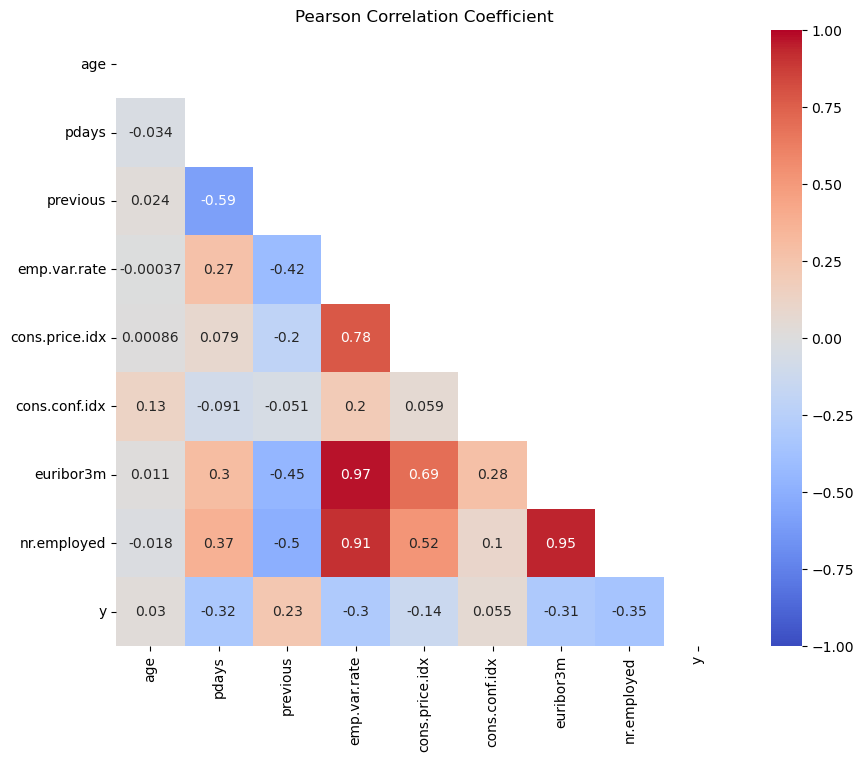

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))

corr = df.corr(method="pearson")

mask = np.triu(np.ones_like(corr))

sns.heatmap(
    corr, vmin=-1, vmax=1, annot=True, square=True, cmap="coolwarm",
    mask=mask
)

ax.set_title('Pearson Correlation Coefficient')

plt.show()

In [21]:
#df_num = df.select_dtypes(include=['int', 'float'])


for col in df_num.columns:
    
    corr_pearson = stats.pearsonr(df_num[col], df_num['y'])
    
    print(f'{col} -- > {corr_pearson}')

age -- > PearsonRResult(statistic=0.030398803040004113, pvalue=6.802136418820705e-10)
pdays -- > PearsonRResult(statistic=-0.3249144776166292, pvalue=0.0)
previous -- > PearsonRResult(statistic=0.23018100321659568, pvalue=0.0)
emp.var.rate -- > PearsonRResult(statistic=-0.2983344261593794, pvalue=0.0)
cons.price.idx -- > PearsonRResult(statistic=-0.13621121281925047, pvalue=9.318964779840192e-170)
cons.conf.idx -- > PearsonRResult(statistic=0.05487794605319662, pvalue=7.536664996950438e-29)
euribor3m -- > PearsonRResult(statistic=-0.3077714039407251, pvalue=0.0)
nr.employed -- > PearsonRResult(statistic=-0.35467829592144284, pvalue=0.0)
y -- > PearsonRResult(statistic=1.0, pvalue=0.0)


We can see that the variables with the highest correlation are `euribor3m` `emp.var.rate`, we will probably exclude one of these variables. Also `nr.employed` is strongly correlated with `euribor3m`, as well as the variables `nr.employed` and `emp.var.rate`. These variables that were mentioned have a correlation above 0.90 which is worrying. They are variables that make sense to be correlated, and we want our independent variables from our dataset that will be implemented in the model to be as independent as possible, so some of these variables will have to be eliminated.


Regarding the correlation with the target, the variable that has the highest correlation with the target is (1) `nr.employed` with 0.35, followed by (2) `pdays` with 0.32, then (3) `euribor3m` with 0.31, followed by the variables (4) `emp.var.rate` with 0.3, (5) `previous`, (6) `cons.price.idx` with 0.055, (7) `cons.conf.idx ` and finally (8) `age` with 0.03.

That said, a possible decision for the feature selection will be to exclude the variables:
- `euribor3m`
- `emp.var.rate`

In [22]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

##### 3.3.1.2. Spearman Correlation Coefficient

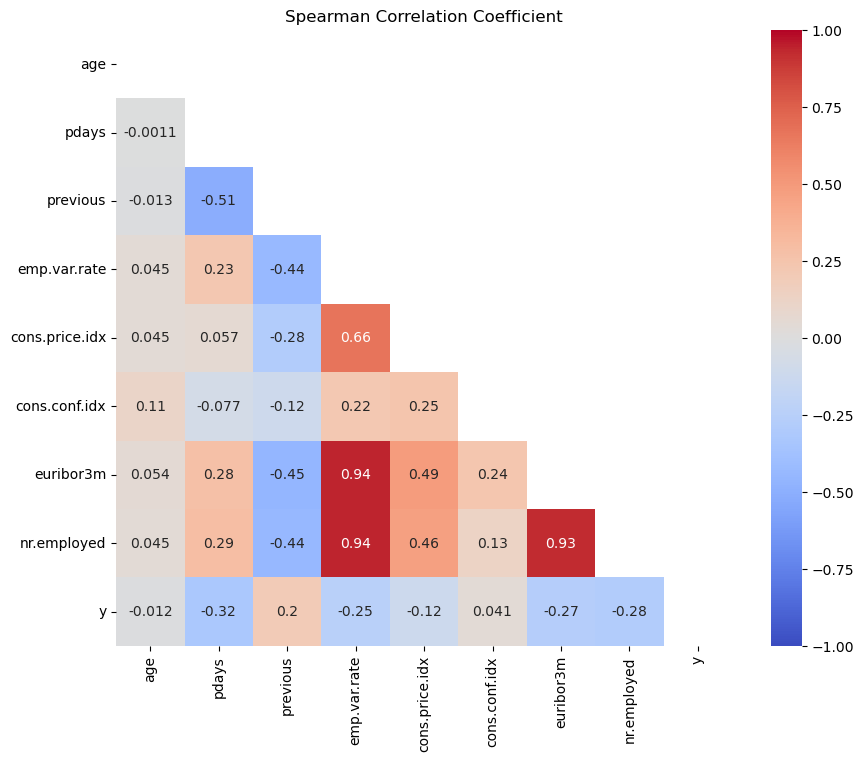

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))

corr = df.corr(method="spearman")

mask = np.triu(np.ones_like(corr))

sns.heatmap(
    corr, vmin=-1, vmax=1, annot=True, square=True, cmap="coolwarm",
    mask=mask
)

ax.set_title('Spearman Correlation Coefficient')

plt.show()

In [24]:
df_num = df.select_dtypes(include=['int', 'float'])


for col in df_num.columns:
    
    corr_spearman = stats.spearmanr(df_num[col], df_num['y'])
    
    print(f'{col} -- > {corr_spearman}')

age -- > SpearmanrResult(correlation=-0.011860718745247863, pvalue=0.016078711774224395)
pdays -- > SpearmanrResult(correlation=-0.3249417994437113, pvalue=0.0)
previous -- > SpearmanrResult(correlation=0.20091403160833127, pvalue=0.0)
emp.var.rate -- > SpearmanrResult(correlation=-0.24747966943978417, pvalue=0.0)
cons.price.idx -- > SpearmanrResult(correlation=-0.12218710346528146, pvalue=9.495550217905643e-137)
cons.conf.idx -- > SpearmanrResult(correlation=0.04122858641488948, pvalue=5.733767718816937e-17)
euribor3m -- > SpearmanrResult(correlation=-0.26682159876160344, pvalue=0.0)
nr.employed -- > SpearmanrResult(correlation=-0.28395704046492, pvalue=0.0)
y -- > SpearmanrResult(correlation=1.0, pvalue=0.0)


> Through the analysis of Spearman's correlation coefficients, we can conclude that we draw the same conclusions as we drew from Pearson's correlation coefficients. The variables are very similarly related in both correlation coefficients. 

In [25]:
# check target dtype

df['y'].dtype

dtype('int64')

In [26]:
# Transform `y` into dtype `category`

df['y'] = df['y'].astype('category')
df['y'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

##### 3.3.1.3. Exclude Numeric Variables

According to the analyzes made above -**Pearson Correlation**, **Spearman Correlation** - the variables likely to be excluded from our dataset are:
- `euribor3m`
- `emp.var.rate`

In [27]:
# Drop variables `emp.var.rate` and `euribor3m`

df.drop(columns = ['emp.var.rate', 'euribor3m'], axis=1, inplace = True)

#### 3.3.2. Categorical variables: Chi-square test

In [28]:
df_cat = df.select_dtypes(include=['object', 'category'])

df_cat.columns.tolist()

['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']

In [29]:
for col in df_cat.columns:
    table = pd.crosstab(df_cat[col], df['y'])
    print('\n', table)
    chi, pval, _, expected_table = stats.chi2_contingency(table)
    print('Chi:', round(chi,2),'| Feature:', col, '| p-value:', pval)


 y                 0     1
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37
Chi: 961.24 | Feature: job | p-value: 4.189763287563623e-199

 y             0     1
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12
Chi: 122.66 | Feature: marital | p-value: 2.068014648442211e-26

 y                        0     1
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251
Chi: 193.11 | Feature: education | p-value:

> Taking into account the p-value values, I would exclude from my models the variables: `loan`, `housing`. Because I want variables with a pvalue equal to or less than **0.05**, and the pvalue of the `housing` variable is `0.05829447669453452`, which is risky to stick with it, because it's approximately **0.06**.

In [30]:
# Drop variables `loan` and `housing`

df.drop(columns = ['loan', 'housing'], axis=1, inplace = True)

## 3.4. Outiliers

<Figure size 2000x1000 with 0 Axes>

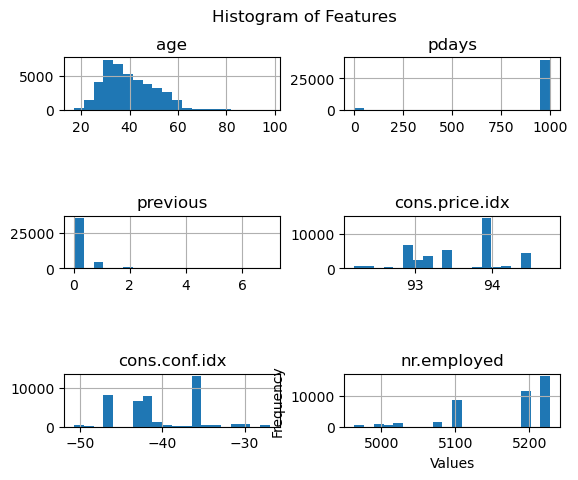

In [31]:
# Check distribution of variables in our dataset

fig = plt.figure(figsize = (20, 10))

df.hist(bins=20)

plt.suptitle("Histogram of Features")
plt.xlabel("Values")
plt.ylabel("Frequency")

plt.subplots_adjust(hspace=2)

plt.show()

In [32]:
df_num = df.select_dtypes(include=['int', 'float'])


for col in df_num.columns:
    
    skewness = stats.skew(df_num[col])
    kurtosis = stats.kurtosis(df_num[col])
    
    if (-2 < skewness < 2) and kurtosis > 2:
        print(f'Variable `{col}` has a skewness of {skewness} and a kurtosis of {kurtosis}')

> This condition allows us to know if we have any variable with normal distribution according to kurtosis and skwness, and we can conclude that we do not have any variable with a normal distribution, as we can also see in the histograms above.

> We can then use the IQR to identify outliers. 

In [33]:
#IQR
def possible_outliers(x):
    
    percentile25 = x.quantile(0.25)
    percentile75 = x.quantile(0.75)
     
    iqr = percentile75 - percentile25
     
     
    upper_lim = percentile75 + 1.5*iqr
    lower_lim = percentile25 - 1.5*iqr
    
    r = (x < lower_lim) | (x > upper_lim)
    
    return r.sum()

In [34]:
for col in df_num.columns:
    num_outliers = possible_outliers(df_num[col])
    
    if num_outliers > 0:
        print(f"Variable '{col}' has {num_outliers} outliers.")

Variable 'age' has 469 outliers.
Variable 'pdays' has 1515 outliers.
Variable 'previous' has 5625 outliers.
Variable 'cons.conf.idx' has 447 outliers.


### 3.4.1. Visualize outliers

#### a) `age`

Text(0.5, 1.0, 'Age - Outliers')

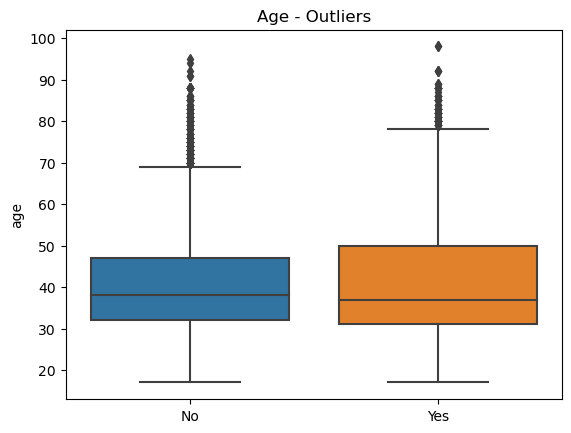

In [35]:
# Vizualizar outliers
#age

fig, ax = plt.figsize=(8, 20)
    
ax = \
sns.boxplot(
    x="y", 
    y="age", 
    data=df
)

labels = ["No", "Yes"]
ax.set_xticklabels(labels) # rename each boxplot
ax.set(xlabel=None); # remove x label (target)

# Title
ax.set_title('Age - Outliers')

#### b) `pdays`

Text(0.5, 1.0, 'Pdays - Outliers')

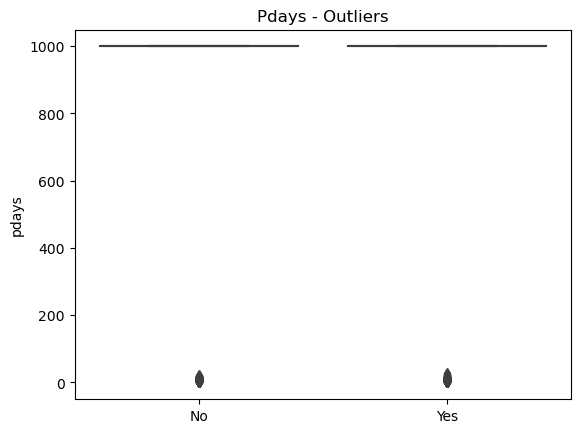

In [36]:
# Vizualize outliers
#pdays

fig, ax = plt.figsize=(8, 20)
    
ax = \
sns.boxplot(
    x="y", 
    y="pdays", 
    data=df
)

labels = ["No", "Yes"]
ax.set_xticklabels(labels) # rename each boxplot
ax.set(xlabel=None); # remove x label (target)

# Title
ax.set_title('Pdays - Outliers')

In [37]:
print('Percentage of outliers in `pdays`:', str(round(possible_outliers(df['pdays'])/df['pdays'].count()*100,2)) + ' %')

Percentage of outliers in `pdays`: 3.68 %


#### c) `previous`

Text(0.5, 1.0, 'Previous - Outliers')

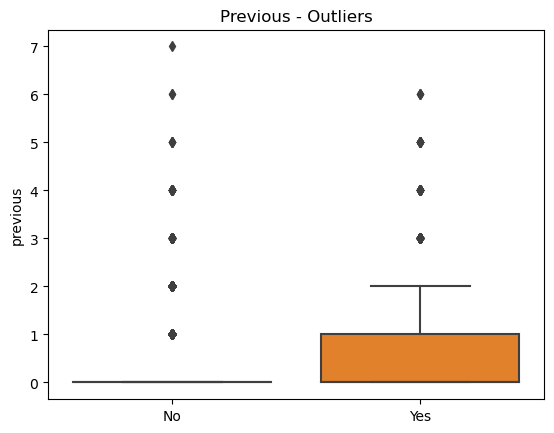

In [38]:
# Vizualize outliers
#previous

fig, ax = plt.figsize=(8, 20)
    
ax = \
sns.boxplot(
    x="y", 
    y="previous", 
    data=df
)

labels = ["No", "Yes"]
ax.set_xticklabels(labels) # rename each boxplot
ax.set(xlabel=None); # remove x label (target)

# Title
ax.set_title('Previous - Outliers')

#### d) `cons.conf.idx`

Text(0.5, 1.0, 'Consumer confidence index - Outliers')

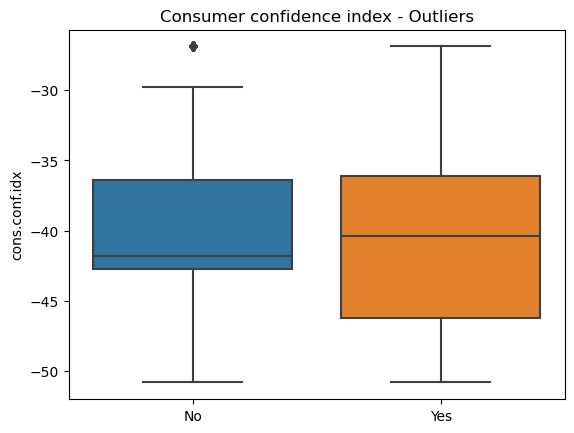

In [39]:
# Vizualize outliers
#cons.conf.idx

fig, ax = plt.figsize=(8, 20)
    
ax = \
sns.boxplot(
    x="y", 
    y="cons.conf.idx", 
    data=df
)

#labels
labels = ["No", "Yes"]
ax.set_xticklabels(labels) # rename each boxplot
ax.set(xlabel=None); # remove x label (target)

# Title
ax.set_title('Consumer confidence index - Outliers')

### 3.4.2. Handle outliers

To handle the outliers, we will use the binning - equal depth technique, with the exception of the `pdays` variable, where we will probably eliminate the outliers. But before dealing with outliers, let's divide the dataset between training and testing, as it is recommended before applying techniques to treat outliers.

In [40]:
# Split dataset into train and test

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = seed)

X_train = train_set.drop(['y'], axis = 1)
y_train = train_set['y'].astype('category')

X_test = test_set.drop(['y'], axis = 1)
y_test = test_set['y'].astype('category')

In [41]:
# To check the dtype of the target variable, if our code above worked

y_train.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

#### a) `age`

In [42]:
disc_quantile_estimator_age = KBinsDiscretizer(n_bins=[3], encode='ordinal', strategy='quantile')

In [43]:
X_train['age'] = disc_quantile_estimator_age.fit_transform(X_train[['age']])

X_test['age'] = disc_quantile_estimator_age.transform(X_test[['age']])

#### b) `pdays`

As there are not many outliers, due to the size of our dataset, we will exclude them.

In [44]:
mask_outliers_pdays = df['pdays' ]< 1000

print('Number of outliers in `pdays` =', mask_outliers_pdays.sum())

Number of outliers in `pdays` = 41188


In [45]:
df = df[~mask_outliers_pdays]

#### c) `previous`

In this variable, we will not touch the outliers. Because there is a possibility of losing information.

#### d) `cons.conf.idx`

In [46]:
disc_quantile_estimator_consconfidx = KBinsDiscretizer(n_bins=[3], encode='ordinal', strategy='quantile')

In [47]:
X_train['cons.conf.idx'] = disc_quantile_estimator_consconfidx.fit_transform(X_train[['cons.conf.idx']])

X_test['cons.conf.idx'] = disc_quantile_estimator_consconfidx.transform(X_test[['cons.conf.idx']])

## 3.5. Missing Values

In [48]:
print('Missing values in our dataset:', '\n', df.isnull().sum())

Missing values in our dataset: 
 age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
pdays             0.0
previous          0.0
poutcome          0.0
cons.price.idx    0.0
cons.conf.idx     0.0
nr.employed       0.0
y                 0.0
dtype: float64


> As we can see above, we don't have missing values in our dataset.

## 3.6. Handle categorical variables


In [49]:
# Recheck categorical variables

X_train_cat = X_train.select_dtypes(include = ['object', 'category'])

X_train_cat.columns

Index(['job', 'marital', 'education', 'default', 'poutcome'], dtype='object')

### a) `job`

In [50]:
X_train.job.value_counts()

admin.           8328
blue-collar      7439
technician       5352
services         3212
management       2310
retired          1363
self-employed    1153
entrepreneur     1145
housemaid         867
unemployed        798
student           721
unknown           262
Name: job, dtype: int64

In [51]:
X_train['job'].unique()

array(['blue-collar', 'admin.', 'retired', 'housemaid', 'management',
       'technician', 'entrepreneur', 'services', 'student', 'unemployed',
       'self-employed', 'unknown'], dtype=object)

In [52]:
# Due to the nature of the variable, as well as context, it makes sense to use a binary encoder technique on this variable
# It seems that there is no inherent order or hierarchy among the categories

binary_encoder_job = BinaryEncoder(drop_invariant=True)

#encode

X_train_job_encoded = binary_encoder_job.fit_transform(X_train[['job']])
X_test_job_encoded = binary_encoder_job.transform(X_test[['job']])

X_train_job_encoded

,job_0,job_1,job_2,job_3
12556,0,0,0,1
35451,0,0,1,0
30592,0,0,1,1
17914,0,1,0,0
3315,0,0,1,0
...,...,...,...,...
6265,0,0,1,1
11284,0,1,0,1
38158,0,0,1,0
860,0,1,0,1


In [53]:
# concat

X_train = pd.concat([X_train, X_train_job_encoded], axis=1)
X_test = pd.concat([X_test, X_test_job_encoded], axis=1)

X_train

,age,job,marital,education,default,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,job_0,job_1,job_2,job_3
12556,1.0,blue-collar,married,basic.9y,unknown,999,0,nonexistent,93.918,1.0,5228.1,0,0,0,1
35451,0.0,admin.,married,university.degree,no,999,0,nonexistent,92.893,0.0,5099.1,0,0,1,0
30592,2.0,retired,married,basic.4y,no,999,1,failure,92.893,0.0,5099.1,0,0,1,1
17914,1.0,housemaid,divorced,basic.9y,no,999,0,nonexistent,93.918,1.0,5228.1,0,1,0,0
3315,1.0,admin.,single,high.school,unknown,999,0,nonexistent,93.994,2.0,5191.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2.0,retired,married,professional.course,unknown,999,0,nonexistent,93.994,2.0,5191.0,0,0,1,1
11284,1.0,management,married,university.degree,no,999,0,nonexistent,94.465,1.0,5228.1,0,1,0,1
38158,1.0,admin.,married,high.school,no,4,1,success,92.431,2.0,5017.5,0,0,1,0
860,1.0,management,married,university.degree,no,999,0,nonexistent,93.994,2.0,5191.0,0,1,0,1


In [54]:
# Drop na variável `job`

X_train.drop('job', axis = 1, inplace = True)

X_test.drop('job', axis = 1, inplace = True)

### b) `marital`

In [55]:
# Taking into account the context of the `marital` variable, let's apply the OHE technique
# It seems that there is no inherent order or hierarchy among the categories

ohe_encoder_marital = OHE(use_cat_names=True)

X_train_marital_encoded = ohe_encoder_marital.fit_transform(X_train[['marital']])
X_test_marital_encoded = ohe_encoder_marital.transform(X_test[['marital']])

X_train_marital_encoded

,marital_married,marital_divorced,marital_single,marital_unknown
12556,1,0,0,0
35451,1,0,0,0
30592,1,0,0,0
17914,0,1,0,0
3315,0,0,1,0
...,...,...,...,...
6265,1,0,0,0
11284,1,0,0,0
38158,1,0,0,0
860,1,0,0,0


In [56]:
X_train['marital'].value_counts()

married     19823
single       9333
divorced     3733
unknown        61
Name: marital, dtype: int64

In [57]:
marital = pd.concat([X_train[['marital']], X_train_marital_encoded ], axis=1)
marital

,marital,marital_married,marital_divorced,marital_single,marital_unknown
12556,married,1,0,0,0
35451,married,1,0,0,0
30592,married,1,0,0,0
17914,divorced,0,1,0,0
3315,single,0,0,1,0
...,...,...,...,...,...
6265,married,1,0,0,0
11284,married,1,0,0,0
38158,married,1,0,0,0
860,married,1,0,0,0


In [58]:
X_train = pd.concat([X_train, X_train_marital_encoded], axis=1)
X_test = pd.concat([X_test, X_test_marital_encoded], axis=1)

X_train

,age,marital,education,default,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,job_0,job_1,job_2,job_3,marital_married,marital_divorced,marital_single,marital_unknown
12556,1.0,married,basic.9y,unknown,999,0,nonexistent,93.918,1.0,5228.1,0,0,0,1,1,0,0,0
35451,0.0,married,university.degree,no,999,0,nonexistent,92.893,0.0,5099.1,0,0,1,0,1,0,0,0
30592,2.0,married,basic.4y,no,999,1,failure,92.893,0.0,5099.1,0,0,1,1,1,0,0,0
17914,1.0,divorced,basic.9y,no,999,0,nonexistent,93.918,1.0,5228.1,0,1,0,0,0,1,0,0
3315,1.0,single,high.school,unknown,999,0,nonexistent,93.994,2.0,5191.0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2.0,married,professional.course,unknown,999,0,nonexistent,93.994,2.0,5191.0,0,0,1,1,1,0,0,0
11284,1.0,married,university.degree,no,999,0,nonexistent,94.465,1.0,5228.1,0,1,0,1,1,0,0,0
38158,1.0,married,high.school,no,4,1,success,92.431,2.0,5017.5,0,0,1,0,1,0,0,0
860,1.0,married,university.degree,no,999,0,nonexistent,93.994,2.0,5191.0,0,1,0,1,1,0,0,0


In [59]:
# Drop na variável `marital`

X_train.drop('marital', axis = 1, inplace = True)

X_test.drop('marital', axis = 1, inplace = True)

### c) `education`

In [60]:
X_train['education'].value_counts().to_frame()

,education
university.degree,9750
high.school,7614
basic.9y,4808
professional.course,4176
basic.4y,3338
basic.6y,1852
unknown,1399
illiterate,13


In [61]:
# Due to the nature of the variable, as well as context, it makes sense to use OHE on this variable
# althought it seems that there is an inherent order or hierarchy among the categories, by applying OHE our models have a better performace than using ordinal encoding 

ohe_encoder_education = OHE(use_cat_names=True)

#encode

X_train_education_encoded = ohe_encoder_education.fit_transform(X_train[['education']])
X_test_education_encoded = ohe_encoder_education.transform(X_test[['education']])

X_train_education_encoded.head()

,education_basic.9y,education_university.degree,education_basic.4y,education_high.school,education_professional.course,education_basic.6y,education_unknown,education_illiterate
12556,1,0,0,0,0,0,0,0
35451,0,1,0,0,0,0,0,0
30592,0,0,1,0,0,0,0,0
17914,1,0,0,0,0,0,0,0
3315,0,0,0,1,0,0,0,0


In [62]:
# concat

X_train = pd.concat([X_train, X_train_education_encoded], axis=1)
X_test = pd.concat([X_test, X_test_education_encoded], axis=1)

X_train

,age,education,default,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,job_0,...,marital_single,marital_unknown,education_basic.9y,education_university.degree,education_basic.4y,education_high.school,education_professional.course,education_basic.6y,education_unknown,education_illiterate
12556,1.0,basic.9y,unknown,999,0,nonexistent,93.918,1.0,5228.1,0,...,0,0,1,0,0,0,0,0,0,0
35451,0.0,university.degree,no,999,0,nonexistent,92.893,0.0,5099.1,0,...,0,0,0,1,0,0,0,0,0,0
30592,2.0,basic.4y,no,999,1,failure,92.893,0.0,5099.1,0,...,0,0,0,0,1,0,0,0,0,0
17914,1.0,basic.9y,no,999,0,nonexistent,93.918,1.0,5228.1,0,...,0,0,1,0,0,0,0,0,0,0
3315,1.0,high.school,unknown,999,0,nonexistent,93.994,2.0,5191.0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2.0,professional.course,unknown,999,0,nonexistent,93.994,2.0,5191.0,0,...,0,0,0,0,0,0,1,0,0,0
11284,1.0,university.degree,no,999,0,nonexistent,94.465,1.0,5228.1,0,...,0,0,0,1,0,0,0,0,0,0
38158,1.0,high.school,no,4,1,success,92.431,2.0,5017.5,0,...,0,0,0,0,0,1,0,0,0,0
860,1.0,university.degree,no,999,0,nonexistent,93.994,2.0,5191.0,0,...,0,0,0,1,0,0,0,0,0,0


In [63]:
#drop `education`

X_train.drop('education', axis=1, inplace=True)
X_test.drop('education', axis=1, inplace=True)

### d) `default`

In [64]:
X_train['default'].value_counts().to_frame()

,default
no,26090
unknown,6857
yes,3


In [65]:
X_train['default'].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [66]:
# Due to the nature of the variable, as well as context, it makes sense to use an OHE on this variable
# It seems that there is no inherent order or hierarchy among the categories

ohe_encoder_default = OHE(use_cat_names=True)

#encode

X_train_default_encoded = ohe_encoder_default.fit_transform(X_train[['default']])
X_test_default_encoded = ohe_encoder_default.transform(X_test[['default']])

X_train_default_encoded.head()

,default_unknown,default_no,default_yes
12556,1,0,0
35451,0,1,0
30592,0,1,0
17914,0,1,0
3315,1,0,0


In [67]:
# concat

X_train = pd.concat([X_train, X_train_default_encoded], axis=1)
X_test = pd.concat([X_test, X_test_default_encoded], axis=1)

X_train

,age,default,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,job_0,job_1,...,education_university.degree,education_basic.4y,education_high.school,education_professional.course,education_basic.6y,education_unknown,education_illiterate,default_unknown,default_no,default_yes
12556,1.0,unknown,999,0,nonexistent,93.918,1.0,5228.1,0,0,...,0,0,0,0,0,0,0,1,0,0
35451,0.0,no,999,0,nonexistent,92.893,0.0,5099.1,0,0,...,1,0,0,0,0,0,0,0,1,0
30592,2.0,no,999,1,failure,92.893,0.0,5099.1,0,0,...,0,1,0,0,0,0,0,0,1,0
17914,1.0,no,999,0,nonexistent,93.918,1.0,5228.1,0,1,...,0,0,0,0,0,0,0,0,1,0
3315,1.0,unknown,999,0,nonexistent,93.994,2.0,5191.0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2.0,unknown,999,0,nonexistent,93.994,2.0,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
11284,1.0,no,999,0,nonexistent,94.465,1.0,5228.1,0,1,...,1,0,0,0,0,0,0,0,1,0
38158,1.0,no,4,1,success,92.431,2.0,5017.5,0,0,...,0,0,1,0,0,0,0,0,1,0
860,1.0,no,999,0,nonexistent,93.994,2.0,5191.0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [68]:
#drop `default`

X_train.drop('default', axis=1, inplace=True)
X_test.drop('default', axis=1, inplace=True)

### e) `poutcome`

In [69]:
X_train['poutcome'].value_counts().to_frame()

,poutcome
nonexistent,28437
failure,3423
success,1090


In [70]:
# Due to the nature of the variable, as well as context, it makes sense to use an OHE on this variable
# It seems that there is no inherent order or hierarchy among the categories

ohe_encoder_poutcome = OHE(use_cat_names=True)

#encode

X_train_poutcome_encoded = ohe_encoder_poutcome.fit_transform(X_train[['poutcome']])
X_test_poutcome_encoded = ohe_encoder_poutcome.transform(X_test[['poutcome']])

X_train_poutcome_encoded.head()

,poutcome_nonexistent,poutcome_failure,poutcome_success
12556,1,0,0
35451,1,0,0
30592,0,1,0
17914,1,0,0
3315,1,0,0


In [71]:
# concat

X_train = pd.concat([X_train, X_train_poutcome_encoded], axis=1)
X_test = pd.concat([X_test, X_test_poutcome_encoded], axis=1)

X_train.head()

,age,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,job_0,job_1,job_2,...,education_professional.course,education_basic.6y,education_unknown,education_illiterate,default_unknown,default_no,default_yes,poutcome_nonexistent,poutcome_failure,poutcome_success
12556,1.0,999,0,nonexistent,93.918,1.0,5228.1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
35451,0.0,999,0,nonexistent,92.893,0.0,5099.1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
30592,2.0,999,1,failure,92.893,0.0,5099.1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
17914,1.0,999,0,nonexistent,93.918,1.0,5228.1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3315,1.0,999,0,nonexistent,93.994,2.0,5191.0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [72]:
#drop `poutcome`

X_train.drop('poutcome', axis=1, inplace=True)
X_test.drop('poutcome', axis=1, inplace=True)

## 3.7. Selection of variables

According to the above analysis, we conclude that the most relevant variables to decide whether a customer is more likely to adhere to the term deposit are:

In [73]:
list(X_train.columns)

['age',
 'pdays',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'job_0',
 'job_1',
 'job_2',
 'job_3',
 'marital_married',
 'marital_divorced',
 'marital_single',
 'marital_unknown',
 'education_basic.9y',
 'education_university.degree',
 'education_basic.4y',
 'education_high.school',
 'education_professional.course',
 'education_basic.6y',
 'education_unknown',
 'education_illiterate',
 'default_unknown',
 'default_no',
 'default_yes',
 'poutcome_nonexistent',
 'poutcome_failure',
 'poutcome_success']

In [74]:
# Dataset final 

X_train.head()

,age,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_0,job_1,job_2,job_3,...,education_professional.course,education_basic.6y,education_unknown,education_illiterate,default_unknown,default_no,default_yes,poutcome_nonexistent,poutcome_failure,poutcome_success
12556,1.0,999,0,93.918,1.0,5228.1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
35451,0.0,999,0,92.893,0.0,5099.1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
30592,2.0,999,1,92.893,0.0,5099.1,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
17914,1.0,999,0,93.918,1.0,5228.1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3315,1.0,999,0,93.994,2.0,5191.0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


# 4. Which algorithm led to the best results?

Since our problem is a classification problem, let's test the models:
- Logistic Regression
- Decision Trees
- Random Forest

In this project, we will not use the Neural Network and SVM models, as they are very complex models, intended for datasets and problems that are also complex. For example, SVM is widely used for problems such as *"handwriting recognition, intrusion detection, face detection, email classification, gene classification, and in web pages"*, and Neural Networks for *"Image and video data, Natural language processing data, Time-series data, Audio data, Graph and network data*. With this, I intend to show how complex and powerful these two models are, too powerful for our problem. As some professors mentioned during the course "a cannon to kill an ant ", so I decided not to use them for this model, sticking with the simplest and most traditional models.

KNN also decided not to use it, because it is a more suitable model for smaller datasets than the one we are working with, as it is a *slow learner* (it does not need to be trained). Why is KNN a **slow learner**? Because the algorithm calculates the Euclidean distance between the test point and all training points, stores the distances in a list and sorts, chooses the first k points and finally assigns the class to the test point based on the majority of the present class. For this reason, we will not use it in this project.

### a) Normalization

Let's create a new normalized dataset, because we're going to test some models that don't need a normalized dataset, as is the case of the Random Forest.

In [75]:
scaler = MinMaxScaler()

features_names = X_train.columns

X_train_scaler = scaler.fit_transform(X_train)
X_train_scaler = pd.DataFrame(X_train, columns = features_names)

X_test_scaler = scaler.transform(X_test)
X_test_scaler = pd.DataFrame(X_test, columns = features_names)

### b) Total Cost Function

$$totalCost = 500∗FP+2000∗FN$$

### c) Baseline

Here we will calculate the baseline, that is, the cost we have without any model.

In [76]:
y_preds_all_bad = np.ones(y_test.shape) 

In [77]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_bad).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 0
Number of True Positives: 935
Number of False Negatives: 0
Number of False Positives: 7303


In [78]:
print('Total Cost:', fp*935)

Total Cost: 6828305


In [79]:
accuracy_score(y_test, y_preds_all_bad)

0.11349842194707453

> If all customers were **bad candidates** (they didn't sign up for term credit), the bank would have a cost of **6 828 305 EUR**.

In [80]:
y_preds_all_good = np.zeros(y_test.shape) 

tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_good).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 7303
Number of True Positives: 0
Number of False Negatives: 935
Number of False Positives: 0


In [81]:
print('Total Cost:', fn*3000)

Total Cost: 2805000


> If all customers were **good candidates** (subscribed to term credit), the bank would have a cost of **2 805 000 EUR** - our baseline.

### d) Evaluation Metric

In [82]:
def total_cost(y_test, y_preds, threshold = 0.5):
    
    tn, fp, fn, tp = confusion_matrix(y_test == 1, y_preds > threshold).ravel()
    
    cost_fn = fn*2000
    cost_fp = fp*500
    
    return cost_fn + cost_fp

In [83]:
def min_cost_threshold(y_test, y_preds, x_limits=None):
    
    costs = {}
    
    for threshold in np.arange(0, 1.1, 0.1):
        
        costs[round(threshold, 1)] = total_cost(y_test, y_preds, threshold = threshold)
        
    plt.plot(list(costs.keys()), list(costs.values()))
    plt.ylabel('Cost')
    plt.xlabel('Threshold')
    
    if x_limits:
        plt.xlim(x_limits)
        
    plt.show()

### e) Target distribution

<AxesSubplot:>

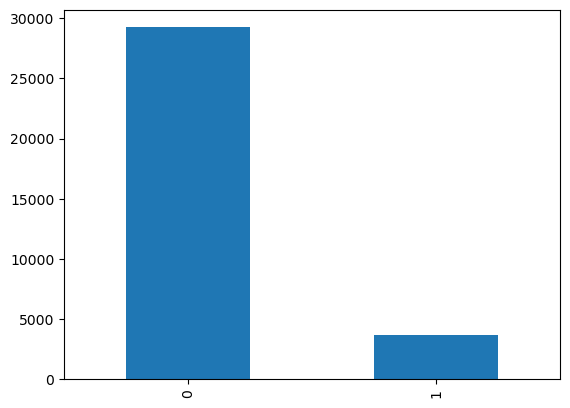

In [84]:
y_train.value_counts().plot(kind='bar')

We have an unbalanced target variable. This information is important for the choice of metrics for model evaluation.

## 4.1. Logistic Regression

In [85]:
%%time
lr = LogisticRegression(max_iter = 500, solver = 'lbfgs', random_state = seed, class_weight = 'balanced' )

parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

clf_lr = GridSearchCV(lr, parameters, cv = 5).fit(X_train, y_train)

CPU times: user 18.6 s, sys: 4.17 s, total: 22.8 s
Wall time: 3.16 s


In [86]:
# mean accuracy

clf_lr.score(X_test, y_test)

0.8067492109735372

In [87]:
y_preds = clf_lr.predict_proba(X_test)[:,1]

In [88]:
#AUC

print('auc:', roc_auc_score(y_test, y_preds))

auc: 0.74823561630595


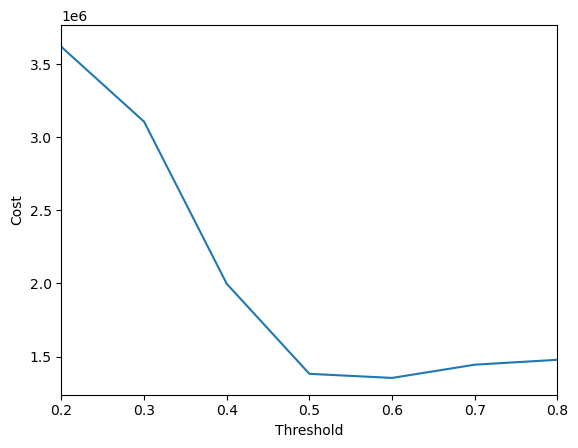

In [89]:
min_cost_threshold(y_test, y_preds, x_limits=([0.2,0.8]))

In [90]:
print('Total Cost:', total_cost(y_test, y_preds, threshold = 0.5), 'EUR')

Total Cost: 1382500 EUR


> With the **Logistic Regression** model the minimum cost for a threshold of 0.5 is **1 382 500 EUR** (AUC-score of 0.7482), which is better than our baseline.  

> **Note:** I tried both normalized and non-normalized datasets and got the same result every time. 

## 4.2. Decision Trees

In [91]:
%%time

trees = tree.DecisionTreeClassifier(random_state = seed,  class_weight = 'balanced')

parameters = {'max_depth':[3, 6], 'min_samples_split': [2, 4, 10]}

clf_tree = GridSearchCV(trees, parameters, cv = 5).fit(X_train, y_train)

CPU times: user 1.21 s, sys: 169 ms, total: 1.38 s
Wall time: 780 ms


In [92]:
clf_tree.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42)

In [93]:
y_preds = clf_tree.predict_proba(X_test)[:,1]

clf_tree.score(X_test, y_test)

0.8466860888565185

In [94]:
# AUC

print('auc:', roc_auc_score(y_test, y_preds))

auc: 0.7745903265891023


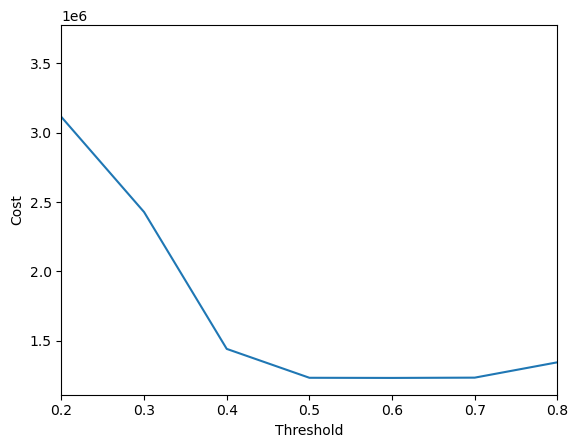

In [95]:
min_cost_threshold(y_test, y_preds, x_limits=([0.2,0.8]))

In [96]:
print('Total Cost:', total_cost(y_test, y_preds, threshold = 0.5), 'EUR')

Total Cost: 1234500 EUR


> With the **Decision Tree** model the minimum cost for a threshold of 0.5 is **1 234 500 EUR** (AUC-score of 0.7745), which is better than our baseline, and the Logistic Regression model .

## 4.3. Random Forests

In [97]:
%%time 
rf = RandomForestClassifier(random_state = seed,  class_weight = 'balanced').fit(X_train, y_train)

parameters = {'n_estimators':[10, 100, 300, 1000]}

clf_rf = GridSearchCV(rf, parameters, cv = 5).fit(X_train, y_train)

CPU times: user 1min 26s, sys: 902 ms, total: 1min 27s
Wall time: 1min 27s


In [98]:
y_preds = clf_rf.predict_proba(X_test)[:,1]

clf_rf.score(X_test, y_test)

0.8316338917212915

In [99]:
#AUC

print('auc:', roc_auc_score(y_test, y_preds))

auc: 0.6881781056938727


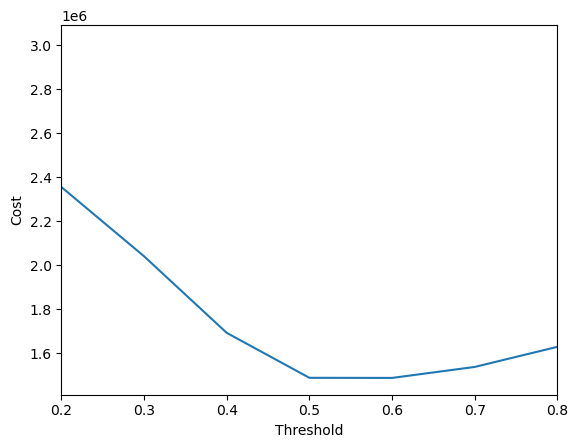

In [100]:
min_cost_threshold(y_test, y_preds, x_limits=([0.2,0.8]))

In [101]:
print('Total Cost:', total_cost(y_test, y_preds, threshold = 0.5), 'EUR')

Total Cost: 1487000 EUR


> With the **Random Forests** model the minimum cost for a threshold of 0.5 is **1 487 000** (AUC-score: 0.6881), which is better than our baseline, however, worse than the Logistic Regression and Decision Tree models. The **Decision Tree** model was the model that led to the best result, with a **total cost of 1 238 500 EUR** and an **AUC-score of 0.7482** (best total cost, and best AUC- score).

### 4.3.1. Feature Importance

Vamos verificar quais as variáveis mais relevantes para avaliar se o cliente tem propensão para ser um bom candidato à campanha de marketing. 

In [102]:
importances = clf_tree.best_estimator_.feature_importances_

In [103]:
# Feature importances

feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
feature_importances



,feature,importance
5,nr.employed,0.820662
3,cons.price.idx,0.102657
1,pdays,0.031615
23,default_no,0.011455
26,poutcome_failure,0.008947
9,job_3,0.004096
2,previous,0.003733
0,age,0.003640
16,education_basic.4y,0.002723
15,education_university.degree,0.002377


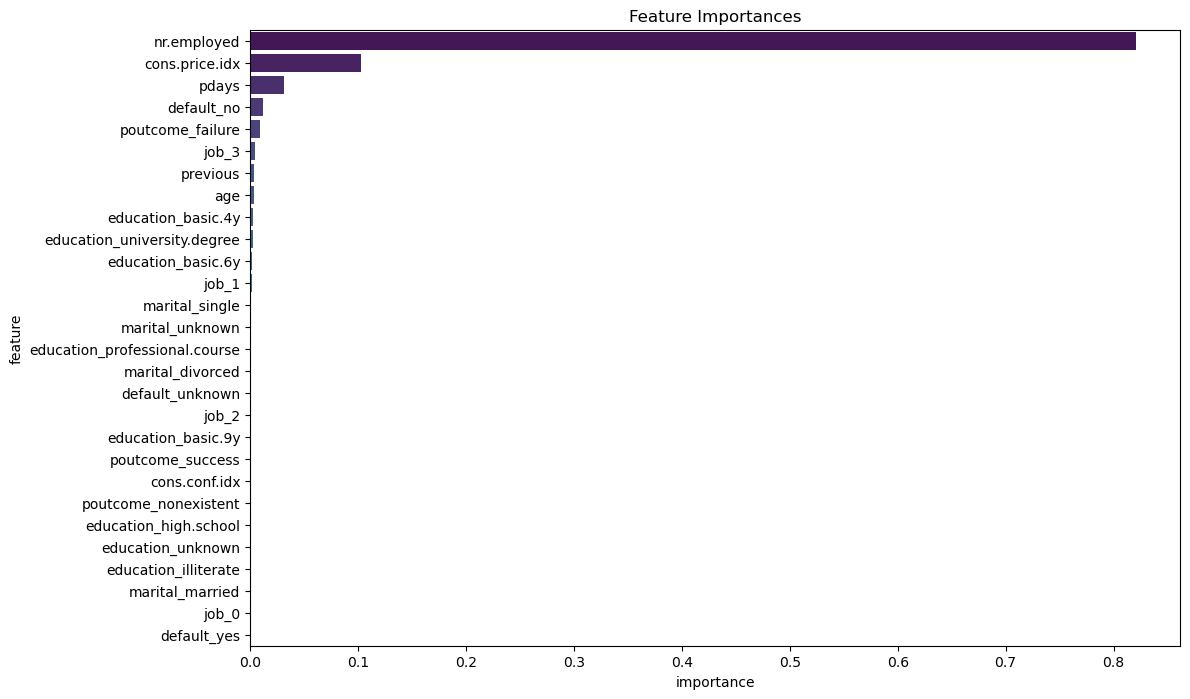

In [104]:
# Para melhor visualizarmos os nossos dados 

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')

plt.show()

As we can see above, the variable with a significant impact on the target variable, and therefore more relevant to decide whether or not the customer is a good candidate for the marketing campaign is (with a significant difference from the other variables) the variable `nr. employed`, followed by the variables `cons.price.idx` and `pdays`.

- The variable `nr.employed` refers to the number of employees in a given economy/sector and is usually measured as a quarterly indicator. This variable is an indicator of the level of employment in a given economy/sector.

- The `cons.price.idx` variable refers to the consumer price index (CPI). It is a monthly indicator that measures changes in the prices of a basket of goods and services consumed by households in a given country or region. The CPI is a key indicator that provides information about the level of inflation and deflation in an economy, as well as consumer purchasing power.

- The `pdays` variable refers to the number of days that have passed since the customer was last contacted for a previous marketing campaign.

# 5. Which/What evaluation metrics did you use to compare the performance of the various models? Why?

As our target variable is unbalanced, the most indicated metric to be used would be the AUC. However, the objective of the work is to find out which model makes the best prediction so that the cost for the Awesome Bank is as low as possible, so for that we used the **Total Cost**.

However, it is also the **Decision Tree model that has the highest AUC-score**.

# 6. What is the cost that the bank has without any model?

Without any model, the Awesome Bank would have a cost of **2 805 000 EUR** (if all customers were bad candidates).

# 7. What is the cost that the bank will have with your model?

With our model, the Awesome Bank has a total cost of **1 234 500 EUR**.

 # 8. Final considerations

- We applied a normalized dataset to this model, even knowing that the models used as a rule are not used with normalized datasets, but just out of curiosity I applied a normalized dataset, obtaining the same result normalizing our dataset.

- The Decision Tree and Random Forest models have a better performance without outliers (with the outliers treated) regarding the **Total Cost**, however the Logistic Regression model has a worse performance. As far as **AUC_score** is concerned, the Decision Tree model performs better without outliers than with outliers, but on the contrary the Logistic Regression and Random Forest models perform worse without outliers. 

- It is interesting that Random forest has a better total cost without outliers, however worse performance in terms of AUC-score.

- It is also quite interesting that the importance of the variables also changes, with the treatment of the variables. Both the order and the weight. Here we also tried not to handle the outliers of the `cons.conf.idx` variable, but we didn't get a better result.

**With outerers:**
- **Logistic Regression:** Total Cost: 1 329 000 EUR | AUC-score: 0.7527
- **Decision Tree:** Total cost: 1 238 500 EUR | AUC-score: 0.7716
- **Random Forests:** Total Cost: 1 526 500 EUR | AUC-score: 0.7158

**No outfitters:**
- **Logistic Regression:** Total Cost: 1 382 500 EUR | AUC-score: 0.7482
- **Decision Tree:** Total cost: 1 234 500 EUR | AUC-score: 0.7745
- **Random Forests:** Total Cost: 1 487 000 EUR | AUC-score: 0.6881



- In like manner, it would be more appropriate to apply ordinal encoding to the variable `education`, however by applying One-hot-encoding the tree models have a better performance.

`education` **- Ordinal Encoding:**
- **Logistic Regression:** Total Cost: 1 396 500 EUR | AUC-score: 0.7516
- **Decision Tree:** Total cost: 1 236 500 EUR | AUC-score: 0.7735
- **Random Forests:** Total Cost: 1 491 500 EUR | AUC-score: 0.6872

We used the dataset without outliers, or with the outliers treated, because it was the one that gave us the best result.